#Importar librerías

In [1]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Leer y escribir fácilmente ficheros en formato CSV
import pandas as pd

# Para hacer tablas
from tabulate import tabulate

# Librerias para graficación
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  #Para graficar superficies 3D

# Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# Le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


#Datos del dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Libreria pandas para leer el dataset.
datos = pd.read_csv('/content/drive/MyDrive/SIS420/maddy/full_data_flightdelay.csv')

In [6]:
# Limpiando el dataset
dataset=datos.drop(columns=['CARRIER_NAME', 'PREVIOUS_AIRPORT','LONGITUDE','DEPARTING_AIRPORT','AIRPORT_FLIGHTS_MONTH','DEP_TIME_BLK','PRCP',	'SNOW',	'SNWD',	'TMAX',	'AWND','AVG_MONTHLY_PASS_AIRPORT','AVG_MONTHLY_PASS_AIRLINE','AIRLINE_FLIGHTS_MONTH'])

In [7]:
# Muestra el dataset limpio
dataset

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRLINE_AIRPORT_FLIGHTS_MONTH,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE
0,1,7,0,2,1,25,143,5873,0.000062,0.000099,8,36.080
1,1,7,0,7,1,29,191,1174,0.000144,0.000149,3,36.080
2,1,7,0,7,1,27,199,1174,0.000144,0.000149,18,36.080
3,1,7,0,9,1,27,180,1174,0.000144,0.000149,2,36.080
4,1,7,0,7,1,10,182,1257,0.000009,0.000125,1,36.080
...,...,...,...,...,...,...,...,...,...,...,...,...
6489057,12,7,0,1,11,3,123,757,0.000120,0.000198,18,21.979
6489058,12,7,0,1,11,2,123,757,0.000120,0.000198,16,21.979
6489059,12,7,0,1,11,2,123,757,0.000120,0.000198,18,21.979
6489060,12,7,0,1,12,3,123,757,0.000120,0.000198,18,21.979


#Datos separados

In [8]:
# Datos separados, el 80% y 20%
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

# Separamos en 'X_test' los datos, pero sin la y que seria 'DEP_DEL15'
X_test = test_dataset.drop(['DEP_DEL15'], axis=1).values

# Separamos en 'y_test' los datos de la columna de 'DEP_DEL15'
y_test = test_dataset['DEP_DEL15'].values

# Tomamos train_dataset, seleccionamos las columnas para 'X_train' y la columna 'DEP_DEL15' para 'y_train'
X_train = train_dataset.drop(['DEP_DEL15'], axis=1).values
y_train = train_dataset['DEP_DEL15'].values
m_train = len(y_train)


#Imprimimos algunos datos:
# Imprimir todos las X de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'Y'
))
print('-' * 110)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}{:8.0f}{:12.0f}'.format(
        X_train[i, 0], X_train[i, 1], X_train[i, 2], X_train[i, 3], X_train[i, 4], X_train[i, 5], X_train[i, 6], X_train[i, 7], X_train[i, 8], X_train[i, 9], X_train[i, 10], y_train[i]
    ))


# Muestra la cantidad de ejemplos
print(" ")
print('El 80% de entrenamiento son la cantidad de: {:.0f} de ejemplos'.format( len(train_dataset)))
print('El 20% para pruebas son la cantidad de: {:.0f} de ejemplos'.format( len(test_dataset)))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]         Y
--------------------------------------------------------------------------------------------------------------
      11       3         2         6      33      69    2542       0       0        15      41           0
      12       5         4         4      81     128   12551       0       0         4      33           0
       4       3         1         2      56      90    7448       0       0         5      35           0
       3       6         4         5       2     129     237       0       0        11      34           0
       9       4         2         4      62     150    8345       0       0        19      35           0
       5       5         7         2      25     178     454       0       0         5      42           0
       4       5         3         2      41      50    5184       0       0        14      42           0
      12       6         4        

#Normalización de características

In [9]:
def  featureNormalize(X):
    X_norm = X.copy()

    # Array de ceros con una longitud igual al número de columnas en el array X.
    # La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # Promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1

    # Formula para normalizar datos
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [10]:
X_norm, mu, sigma= featureNormalize(X_train)

# Imprime todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}'.format(
        X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], X_norm[i, 7], X_norm[i, 8], X_norm[i, 9], X_norm[i, 10]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]
--------------------------------------------------------------------------------------------------------------
   1.294  -0.469    -0.765     1.680   0.240  -1.394  -0.216  -1.114  -0.252     0.500   0.740
   1.588   0.533     0.075     0.542   2.472  -0.124   2.139   0.008   0.897    -1.086  -0.693
  -0.767  -0.469    -1.184    -0.596   1.310  -0.942   0.939  -1.128  -0.980    -0.942  -0.270
  -1.062   1.035     0.075     1.111  -1.201  -0.102  -0.758  -1.128  -0.980    -0.077  -0.571
   0.705   0.032    -0.765     0.542   1.589   0.350   1.150   0.008   0.897     1.077  -0.270
  -0.473   0.533     1.334    -0.596  -0.132   0.953  -0.707  -1.022  -0.235    -0.942   1.028
  -0.767   0.533    -0.345    -0.596   0.612  -1.803   0.406   2.902  -0.617     0.356   0.958
   1.588   1.035     0.075    -0.027   0.101  -1.803  -0.108  -0.733  -0.786    -1.374  -0.502
   1.294  -0.970    -0.765    -0.

In [11]:
X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)

# print(len(X_ready[0]))

# Imprime todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 130)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}'.format(
        X_ready[i, 0], X_ready[i, 1], X_ready[i, 2], X_ready[i, 3], X_ready[i, 4], X_ready[i, 5], X_ready[i, 6], X_ready[i, 7], X_ready[i, 8], X_ready[i, 9], X_ready[i, 10], X_ready[i, 11]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
----------------------------------------------------------------------------------------------------------------------------------
   1.000   1.294    -0.469    -0.765   1.680   0.240  -1.394  -0.216  -1.114    -0.252   0.500   0.740
   1.000   1.588     0.533     0.075   0.542   2.472  -0.124   2.139   0.008     0.897  -1.086  -0.693
   1.000  -0.767    -0.469    -1.184  -0.596   1.310  -0.942   0.939  -1.128    -0.980  -0.942  -0.270
   1.000  -1.062     1.035     0.075   1.111  -1.201  -0.102  -0.758  -1.128    -0.980  -0.077  -0.571
   1.000   0.705     0.032    -0.765   0.542   1.589   0.350   1.150   0.008     0.897   1.077  -0.270
   1.000  -0.473     0.533     1.334  -0.596  -0.132   0.953  -0.707  -1.022    -0.235  -0.942   1.028
   1.000  -0.767     0.533    -0.345  -0.596   0.612  -1.803   0.406   2.902    -0.617   0.356   0.958
   1.000   1.588     1.035     0.075  -0.0

#Función Sigmoidea

In [12]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # Convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [13]:
print(sigmoid(0))

0.5


In [14]:
z = [0.5, 6, 5]
print(sigmoid(z))

[0.62245933 0.99752738 0.99330715]


# Calculo de costo y descenso con regularizacion

In [15]:
def calcularCostoCR(theta, X, y, lambda_):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0

    # temp = theta.copy()
    # temp[0] = 0

    #hacemos el uso de la funcion sigmoid
    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    # Calculamos el término de regularización (sin incluir el primer término de theta)
    regularization_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))

    # Sumamos el término de regularización al costo total
    J += regularization_term

    return J

In [16]:
def descensoGradienteCR(theta, X, y, alpha, lambda_, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))

        # Calcula el gradiente descendente sin regularización
        gradient = (1 / m) * X.T.dot(h - y)

        # Calcula el término de regularización (excepto para el término de sesgo theta[0])
        regularization_term = (lambda_ / m) * theta[1:]

        # theta[0] -= alpha * (1 / m) * np.sum(h - y)
        theta[0] -= alpha * gradient[0]
        theta[1:] -= alpha * (gradient[1:]+ regularization_term)

        # Calcula y guarda el costo en cada iteración
        J_history.append(calcularCostoCR(theta, X, y, lambda_))

    return theta, J_history

# Calculo de costo y descenso sin regularizacion

In [17]:
def calcularCostoSR(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0

    #hacemos el uso de la funcion sigmoid
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [18]:
def descensoGradienteSR(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCostoSR(theta, X, y))
    return theta, J_history

# Con regularizacion

##Regresion

In [20]:

X_testCR = X_test.copy()
y_testCR = y_test.copy()
m_test_CR = len(y_testCR)


X_trainCR = X_train.copy()
y_trainCR = y_train.copy()
m_train_CR = len(y_trainCR)

print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'Y'
))
print('-' * 110)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}{:8.0f}{:12.0f}'.format(
        X_trainCR[i, 0],
        X_trainCR[i, 1],
        X_trainCR[i, 2],
        X_trainCR[i, 3],
        X_trainCR[i, 4],
        X_trainCR[i, 5],
        X_trainCR[i, 6],
        X_trainCR[i, 7],
        X_trainCR[i, 8],
        X_trainCR[i, 9],
        X_trainCR[i, 10],
        y_trainCR[i]
    ))

#mostramos la cantidad de ejemplos
print(" ")
print('El 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} de ejemplos'.format( len(train_dataset)))
print('El 20% de ejemplos para pruebas son la cantidad de: {:.0f} de ejemplos'.format( len(test_dataset)))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]         Y
--------------------------------------------------------------------------------------------------------------
      11       3         2         6      33      69    2542       0       0        15      41           0
      12       5         4         4      81     128   12551       0       0         4      33           0
       4       3         1         2      56      90    7448       0       0         5      35           0
       3       6         4         5       2     129     237       0       0        11      34           0
       9       4         2         4      62     150    8345       0       0        19      35           0
       5       5         7         2      25     178     454       0       0         5      42           0
       4       5         3         2      41      50    5184       0       0        14      42           0
      12       6         4        

##Normalizacion

Se hace uso de la funcion de `featureNormalize(X) ` donde se recibe un parametro de tipo matriz para normalizar cada dato dentro de ella, retornandome la **matriz normalizda**, **sigma(desviacion estandar)**, y mi **mu(media)**.

Almacenando los datos normalizados en **X_norm** usando la funcion **featureNormaliza()**, normalizando los datos de X_train

In [23]:
X_norm_CR, mu_CR, sigma_CR= featureNormalize(X_trainCR)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}'.format(
        X_norm_CR[i, 0],
        X_norm_CR[i, 1],
        X_norm_CR[i, 2],
        X_norm_CR[i, 3],
        X_norm_CR[i, 4],
        X_norm_CR[i, 5],
        X_norm_CR[i, 6],
        X_norm_CR[i, 7],
        X_norm_CR[i, 8],
        X_norm_CR[i, 9],
        X_norm_CR[i, 10]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]
--------------------------------------------------------------------------------------------------------------
   1.294  -0.469    -0.765     1.680   0.240  -1.394  -0.216  -1.114  -0.252     0.500   0.740
   1.588   0.533     0.075     0.542   2.472  -0.124   2.139   0.008   0.897    -1.086  -0.693
  -0.767  -0.469    -1.184    -0.596   1.310  -0.942   0.939  -1.128  -0.980    -0.942  -0.270
  -1.062   1.035     0.075     1.111  -1.201  -0.102  -0.758  -1.128  -0.980    -0.077  -0.571
   0.705   0.032    -0.765     0.542   1.589   0.350   1.150   0.008   0.897     1.077  -0.270
  -0.473   0.533     1.334    -0.596  -0.132   0.953  -0.707  -1.022  -0.235    -0.942   1.028
  -0.767   0.533    -0.345    -0.596   0.612  -1.803   0.406   2.902  -0.617     0.356   0.958
   1.588   1.035     0.075    -0.027   0.101  -1.803  -0.108  -0.733  -0.786    -1.374  -0.502
   1.294  -0.970    -0.765    -0.

##columna de unos

In [24]:
X_ready_CR = np.concatenate([np.ones((m_train_CR, 1)), X_norm_CR], axis=1)

# print(len(X_ready[0]))

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 130)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}'.format(
        X_ready_CR[i, 0],
        X_ready_CR[i, 1],
        X_ready_CR[i, 2],
        X_ready_CR[i, 3],
        X_ready_CR[i, 4],
        X_ready_CR[i, 5],
        X_ready_CR[i, 6],
        X_ready_CR[i, 7],
        X_ready_CR[i, 8],
        X_ready_CR[i, 9],
        X_ready_CR[i, 10],
        X_ready_CR[i, 11]
    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
----------------------------------------------------------------------------------------------------------------------------------
   1.000   1.294    -0.469    -0.765   1.680   0.240  -1.394  -0.216  -1.114    -0.252   0.500   0.740
   1.000   1.588     0.533     0.075   0.542   2.472  -0.124   2.139   0.008     0.897  -1.086  -0.693
   1.000  -0.767    -0.469    -1.184  -0.596   1.310  -0.942   0.939  -1.128    -0.980  -0.942  -0.270
   1.000  -1.062     1.035     0.075   1.111  -1.201  -0.102  -0.758  -1.128    -0.980  -0.077  -0.571
   1.000   0.705     0.032    -0.765   0.542   1.589   0.350   1.150   0.008     0.897   1.077  -0.270
   1.000  -0.473     0.533     1.334  -0.596  -0.132   0.953  -0.707  -1.022    -0.235  -0.942   1.028
   1.000  -0.767     0.533    -0.345  -0.596   0.612  -1.803   0.406   2.902    -0.617   0.356   0.958
   1.000   1.588     1.035     0.075  -0.0

##Descenso por el gradiente

In [44]:
theta_CR=np.array([0.2, 3.0, 0.2,0.1, 3.0, 0.2,1.1, 2.0, 0.7,0.8, 5.8, 0.9])
theta_CR1=np.array([0.1, 2.0, 0.5,0.2, 8.0, 0.7,1.3, 8.0, 1.7,0.7, 7.1, 7.2])

lambda_ = 1000
print(theta_CR.shape[0])

print(f"con theta:{ theta_CR } se obtiene un costo de: {calcularCostoCR(theta_CR, X_ready_CR, y_trainCR, lambda_)}")
print(f"con theta:{ theta_CR1 } se obtiene un costo de: {calcularCostoCR(theta_CR ,X_ready_CR, y_trainCR, lambda_)}")

12


<ipython-input-15-32cadc5d225f>:13: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


con theta:[0.2 3.  0.2 0.1 3.  0.2 1.1 2.  0.7 0.8 5.8 0.9] se obtiene un costo de: nan
con theta:[0.1 2.  0.5 0.2 8.  0.7 1.3 8.  1.7 0.7 7.1 7.2] se obtiene un costo de: nan


In [35]:
#creamos un theta con 19 columnas de ceros
theta_CR = np.zeros(len(X_ready_CR[0]))

#numero de iteraciones sera 900 y un alpha 0.009
num_ite_CR = 1500
alpha_CR = 0.009
lambda_CR = 1000

theta_CR, J_historico_CR = descensoGradienteCR(theta_CR, X_ready_CR, y_trainCR, alpha_CR, lambda_CR, num_ite_CR)

print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht in theta_CR:
    i += 1
    print(f"theta {i}: {tht}")


print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico_CR[-1]} ")

########################################################################################################
Los valores de theta calculados son:
theta 1: -1.3333068978903562
theta 2: -0.040952626602171534
theta 3: 0.004787038158574487
theta 4: 0.06967494902286026
theta 5: 0.24348559973491524
theta 6: 0.016628221937458772
theta 7: 0.047945167432344164
theta 8: 0.009182030168331856
theta 9: 0.004926545666151925
theta 10: -0.028388509323318826
theta 11: 0.009232767621945848
theta 12: 0.013151151993884986
########################################################################################################
con un costo de: 0.47865664709926936 


##Grafica de la convergencia del costo

Text(0, 0.5, 'Costo J')

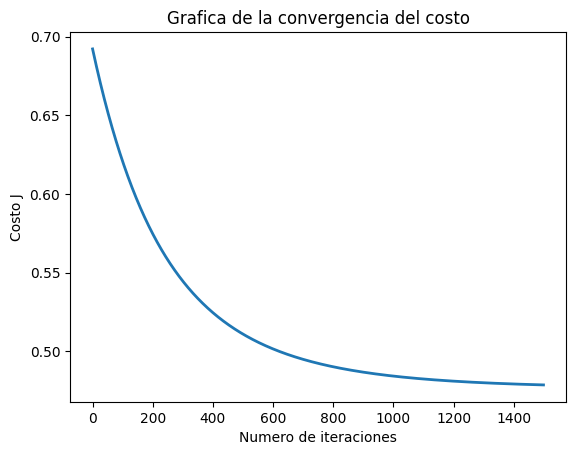

In [36]:
pyplot.plot(np.arange(len(J_historico_CR)), J_historico_CR, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

In [45]:
X_array_CR = [1,7,0,2,1,25,143,5873,0.000062,0.000099,8,36.080]
X_array_copy_CR = X_array_CR.copy()
#Se normaliza las caracteristicas para la prueba. haciendo el uso de mu y sigma calculados anteriormente, solamente los valores despues del primero, porque este es el 1.
X_array_CR[1:] = (X_array_CR[1:] - mu_CR) / sigma_CR

resultados_CR = sigmoid(np.dot(X_array_CR, theta_CR))

print(f"Una pasajero con las caracteristicas: {X_array_copy_CR} ")
print(f'Tiene una probabilidad de que su vuelo se retrase de un: {resultados_CR * 100} %')

print(f"Con valores de theta: { theta_CR }")

Una pasajero con las caracteristicas: [1, 7, 0, 2, 1, 25, 143, 5873, 6.2e-05, 9.9e-05, 8, 36.08] 
Tiene una probabilidad de que su vuelo se retrase de un: 0.23272420359230225 %
Con valores de theta: [0.2 3.  0.2 0.1 3.  0.2 1.1 2.  0.7 0.8 5.8 0.9]


##Predicciones


In [39]:
nombres_columnas = ['MONTH',	'DAY_OF_WEEK',	'DISTANCE_GROUP',	'SEGMENT_NUMBER',	'CONCURRENT_FLIGHTS',	'NUMBER_OF_SEATS',	'AIRLINE_AIRPORT_FLIGHTS_MONTH',	'FLT_ATTENDANTS_PER_PASS',	'GROUND_SERV_PER_PASS',	'PLANE_AGE',	'LATITUDE',	'DEP_DEL15']
matriz_datos_CR = np.array([
[1,7,2,1,25,143,5873,0.000062,0.000099,8,36.080],
[1,7,2,1,24,143,5873,0.000062,0.000095,8,28.080],
[2,5,4,1,25,173,5876,0.000062,0.000099,8,30.080],
[2,4,4,1,27,134,5876,0.000065,0.000099,8,34.080],
[3,6,6,1,25,156,5876,0.000062,0.000094,9,36.080],
[3,1,4,1,25,152,5878,0.000062,0.000099,9,36.080],
[4,2,2,1,26,149,5878,0.000062,0.000097,12,32.080],
[4,3,4,1,27,146,5878,0.000073,0.000099,12,26.080],
[5,4,6,1,28,143,5886,0.000062,0.000099,16,29.080],
[6,5,2,1,29,142,5887,0.000062,0.000098,16,36.080],
[7,6,4,1,25,143,5888,0.000054,0.000099,21,34.080],
])
para_tabla = matriz_datos_CR.copy()
#creamos un vector parta almacenar cada Y predicha
y_pre_CR = []

matriz_datos_CR = (matriz_datos_CR- mu_CR) / sigma_CR
matriz_datos_CR = np.concatenate([np.ones((len(matriz_datos_CR), 1)), matriz_datos_CR], axis=1)

# Calculamos la Y predicha de los 11 ejemplos de prediccion
# Calculamos la Y predicha de cada fila de la matriz
for j in matriz_datos_CR:
    y_pre_CR.append(sigmoid(np.dot(j, theta_CR)))

# Convertimos la lista a un array unidimensional

y_pre_CR = np.array(y_pre_CR)

# usamos umbral para definir si tiene o no la enfermedad
y_pre_umbral_CR = (y_pre_CR >= 0.5).astype(int)

para_tabla = np.column_stack((para_tabla, y_pre_CR))
para_tabla = np.column_stack((para_tabla, y_pre_umbral_CR))
# Convertir la matriz en una lista de listas
datos_para_tabla = para_tabla.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

+----+---------+---------------+------------------+------------------+----------------------+-------------------+---------------------------------+---------------------------+------------------------+-------------+------------+-------------+
|    |   MONTH |   DAY_OF_WEEK |   DISTANCE_GROUP |   SEGMENT_NUMBER |   CONCURRENT_FLIGHTS |   NUMBER_OF_SEATS |   AIRLINE_AIRPORT_FLIGHTS_MONTH |   FLT_ATTENDANTS_PER_PASS |   GROUND_SERV_PER_PASS |   PLANE_AGE |   LATITUDE |   DEP_DEL15 |
+====+=========+===============+==================+==================+======================+===================+=================================+===========================+========================+=============+============+=============+
|  1 |       7 |             2 |                1 |               25 |                  143 |              5873 |                         6.2e-05 |                   9.9e-05 |                      8 |       36.08 |   0.17243  |           0 |
+----+---------+---------------+

## Validaciones

In [40]:
X_norm_test_CR = (X_testCR- mu_CR) / sigma_CR
m_test= len(X_testCR)

In [41]:
X_test_ready_CR = np.concatenate([np.ones((m_test_CR, 1)), X_norm_test_CR], axis=1)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}'.format(
    X_test_ready_CR[i, 0],
    X_test_ready_CR[i, 1],
    X_test_ready_CR[i, 2],
    X_test_ready_CR[i, 3],
    X_test_ready_CR[i, 4],
    X_test_ready_CR[i, 5],
    X_test_ready_CR[i, 6],
    X_test_ready_CR[i, 7],
    X_test_ready_CR[i, 8],
    X_test_ready_CR[i, 9],
    X_test_ready_CR[i, 10],
    X_test_ready_CR[i, 11]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
--------------------------------------------------------------------------------------------------------------
   1.000  -1.062     0.533    -0.345   0.542  -0.039  -1.394  -0.114  -1.114    -0.252  -0.077   0.390
   1.000   0.705     1.536     0.495  -1.165  -0.969  -0.124   0.081   0.008     0.897  -0.798  -1.984
   1.000   1.588    -1.471    -0.345   1.111  -0.597  -1.243  -0.653  -1.128    -0.904  -0.942  -0.151
   1.000   0.410    -0.469     0.915  -0.596  -0.271   3.062   0.300   1.807     2.009   0.788   0.725
   1.000   0.705     0.533    -0.765  -1.165  -1.155  -1.243  -0.798  -1.128    -0.952  -1.374  -0.092
   1.000   1.588    -1.471    -0.765  -1.165   0.473  -1.458   0.432  -0.733    -0.786  -0.221   0.958
   1.000   1.588     1.536    -1.184  -0.596  -0.178  -0.038  -0.453   0.539     0.282   0.788   1.028
   1.000  -0.473     1.035     0.915  -0.027  -0.922  -1.372  

In [42]:
y_predicha_CR =[]
# Calculamos la Y predicha de cada fila de la matriz
for dato in X_test_ready_CR:
    y_predicha_CR.append(sigmoid(np.dot(dato, theta_CR.T)))

# Convertimos la lista a un array unidimensional
y_predicha_CR = np.array(y_predicha_CR)

#usando el umbral donde todo aquello que sea >= 0.5 sera 1, y si es menor sera 0
y_umbral_CR = (y_predicha_CR >= 0.5).astype(int)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>25s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]','y','(y) usando el umbral'
))
print('-' * 140)

#Mostrando algunos datos
for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}{:15.2f}{:15.0f}'.format(
    X_test_ready_CR[i, 0],
    X_test_ready_CR[i, 1],
    X_test_ready_CR[i, 2],
    X_test_ready_CR[i, 3],
    X_test_ready_CR[i, 4],
    X_test_ready_CR[i, 5],
    X_test_ready_CR[i, 6],
    X_test_ready_CR[i, 7],
    X_test_ready_CR[i, 8],
    X_test_ready_CR[i, 9],
    X_test_ready_CR[i, 10],
    X_test_ready_CR[i, 11],
    y_predicha_CR[i],
    y_umbral_CR[i]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]         y     (y) usando el umbral
--------------------------------------------------------------------------------------------------------------------------------------------
   1.000  -1.062     0.533    -0.345   0.542  -0.039  -1.394  -0.114  -1.114    -0.252  -0.077   0.390           0.22              0
   1.000   0.705     1.536     0.495  -1.165  -0.969  -0.124   0.081   0.008     0.897  -0.798  -1.984           0.16              0
   1.000   1.588    -1.471    -0.345   1.111  -0.597  -1.243  -0.653  -1.128    -0.904  -0.942  -0.151           0.23              0
   1.000   0.410    -0.469     0.915  -0.596  -0.271   3.062   0.300   1.807     2.009   0.788   0.725           0.21              0
   1.000   0.705     0.533    -0.765  -1.165  -1.155  -1.243  -0.798  -1.128    -0.952  -1.374  -0.092           0.14              0
   1.000   1.588    -1.471    -0.765  -1.165   0.473 

##precision del entrenamiento:


In [43]:
print('Precisión de entrenamiento: {:.5f} %'.format(np.mean(y_umbral_CR == y_testCR) * 100))

Precisión de entrenamiento: 81.06453 %


# Sin regularizacion

##Regresion Logistica

In [47]:

X_testSR = X_test.copy()
y_testSR = y_test.copy()
m_test_SR = len(y_testSR)


X_trainSR = X_train.copy()
y_trainSR = y_train.copy()
m_train_SR = len(y_trainSR)

#Imprimimos algunos datos:
# imprimir todos las X de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'Y'
))
print('-' * 110)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}{:8.0f}{:12.0f}'.format(
        X_trainSR[i, 0],
        X_trainSR[i, 1],
        X_trainSR[i, 2],
        X_trainSR[i, 3],
        X_trainSR[i, 4],
        X_trainSR[i, 5],
        X_trainSR[i, 6],
        X_trainSR[i, 7],
        X_trainSR[i, 8],
        X_trainSR[i, 9],
        X_trainSR[i, 10],
        y_trainSR[i]
    ))

#mostramos la cantidad de ejemplos
print(" ")
print('El 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} de ejemplos'.format( len(train_dataset)))
print('El 20% de ejemplos para pruebas son la cantidad de: {:.0f} de ejemplos'.format( len(test_dataset)))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]         Y
--------------------------------------------------------------------------------------------------------------
      11       3         2         6      33      69    2542       0       0        15      41           0
      12       5         4         4      81     128   12551       0       0         4      33           0
       4       3         1         2      56      90    7448       0       0         5      35           0
       3       6         4         5       2     129     237       0       0        11      34           0
       9       4         2         4      62     150    8345       0       0        19      35           0
       5       5         7         2      25     178     454       0       0         5      42           0
       4       5         3         2      41      50    5184       0       0        14      42           0
      12       6         4        

##Normalizacion

In [48]:
X_norm_SR, mu_SR, sigma_SR= featureNormalize(X_trainSR)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}'.format(
        X_norm_SR[i, 0],
        X_norm_SR[i, 1],
        X_norm_SR[i, 2],
        X_norm_SR[i, 3],
        X_norm_SR[i, 4],
        X_norm_SR[i, 5],
        X_norm_SR[i, 6],
        X_norm_SR[i, 7],
        X_norm_SR[i, 8],
        X_norm_SR[i, 9],
        X_norm_SR[i, 10]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]
--------------------------------------------------------------------------------------------------------------
   1.294  -0.469    -0.765     1.680   0.240  -1.394  -0.216  -1.114  -0.252     0.500   0.740
   1.588   0.533     0.075     0.542   2.472  -0.124   2.139   0.008   0.897    -1.086  -0.693
  -0.767  -0.469    -1.184    -0.596   1.310  -0.942   0.939  -1.128  -0.980    -0.942  -0.270
  -1.062   1.035     0.075     1.111  -1.201  -0.102  -0.758  -1.128  -0.980    -0.077  -0.571
   0.705   0.032    -0.765     0.542   1.589   0.350   1.150   0.008   0.897     1.077  -0.270
  -0.473   0.533     1.334    -0.596  -0.132   0.953  -0.707  -1.022  -0.235    -0.942   1.028
  -0.767   0.533    -0.345    -0.596   0.612  -1.803   0.406   2.902  -0.617     0.356   0.958
   1.588   1.035     0.075    -0.027   0.101  -1.803  -0.108  -0.733  -0.786    -1.374  -0.502
   1.294  -0.970    -0.765    -0.

In [49]:
X_ready_SR = np.concatenate([np.ones((m_train_SR, 1)), X_norm_SR], axis=1)

print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 130)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}'.format(
        X_ready_SR[i, 0],
        X_ready_SR[i, 1],
        X_ready_SR[i, 2],
        X_ready_SR[i, 3],
        X_ready_SR[i, 4],
        X_ready_SR[i, 5],
        X_ready_SR[i, 6],
        X_ready_SR[i, 7],
        X_ready_SR[i, 8],
        X_ready_SR[i, 9],
        X_ready_SR[i, 10],
        X_ready_SR[i, 11]
    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
----------------------------------------------------------------------------------------------------------------------------------
   1.000   1.294    -0.469    -0.765   1.680   0.240  -1.394  -0.216  -1.114    -0.252   0.500   0.740
   1.000   1.588     0.533     0.075   0.542   2.472  -0.124   2.139   0.008     0.897  -1.086  -0.693
   1.000  -0.767    -0.469    -1.184  -0.596   1.310  -0.942   0.939  -1.128    -0.980  -0.942  -0.270
   1.000  -1.062     1.035     0.075   1.111  -1.201  -0.102  -0.758  -1.128    -0.980  -0.077  -0.571
   1.000   0.705     0.032    -0.765   0.542   1.589   0.350   1.150   0.008     0.897   1.077  -0.270
   1.000  -0.473     0.533     1.334  -0.596  -0.132   0.953  -0.707  -1.022    -0.235  -0.942   1.028
   1.000  -0.767     0.533    -0.345  -0.596   0.612  -1.803   0.406   2.902    -0.617   0.356   0.958
   1.000   1.588     1.035     0.075  -0.0

##Descenso por el gradiente


In [ ]:

theta_SR = np.zeros(len(X_ready_SR[0]))

#numero de iteraciones sera 900 y un alpha 0.009
num_ite_SR = 15000
alpha_SR = 0.0009

theta_SR, J_historico_SR = descensoGradienteSR(theta_SR, X_ready_SR, y_trainSR, alpha_SR, num_ite_SR)

print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht_SR in theta_SR:
    i += 1
    print(f"theta {i}: {tht_SR}")


print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico_SR[-1]} ")

##Grafica de la convergencia

Text(0, 0.5, 'Costo J')

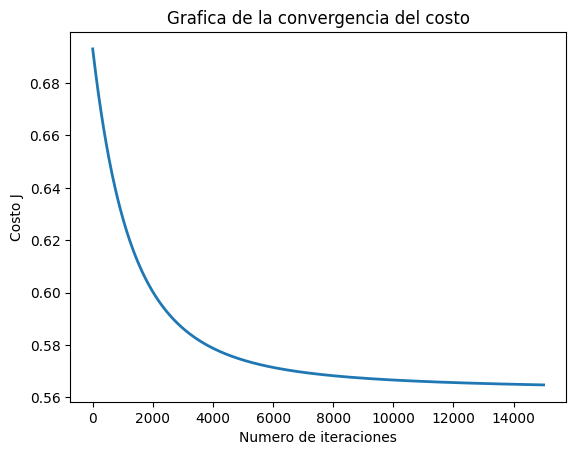

In [ ]:
pyplot.plot(np.arange(len(J_historico_SR)), J_historico_SR, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

In [ ]:
X_array_SR = [1,58,1,159,53,110,70,1,1,0,0,1]
X_array_copy_SR = X_array_SR.copy()
#Se normaliza las caracteristicas para la prueba. haciendo el uso de mu y sigma calculados anteriormente, solamente los valores despues del primero, porque este es el 1.
X_array_SR[1:] = (X_array_SR[1:] - mu_SR) / sigma_SR

resultados_SR = sigmoid(np.dot(X_array_SR, theta_SR))

print(f"Una pasajero con las caracteristicas: {X_array_copy_SR} ")
print(f'Tiene una probabilidad de que su vuelo se retrase de: {resultados_SR * 100} %')

print(f"Con valores de theta: { theta_SR }")

Una persona con las caracteristicas: [1, 58, 1, 159, 53, 110, 70, 1, 1, 0, 0, 1] 
Tiene una probabilidad de tener diabetes de: 23.457839572489682 %
Con valores de theta: [ 0.00410079  0.33329367 -0.01440155 -0.03335109  0.16883752  0.67478395
  0.30287489  0.29869993 -0.02134335 -0.04031841 -0.04193559 -0.08690755]


In [ ]:
nombres_columnas = ['AGE','GENDER','HEIGHT','WEIGHT','AP_HIGH','AP_LOW','CHOLESTEROL','GLUCOSE','SMOKE','ALCOHOL','PHYSICAL_ACTIVITY','CARDIO_DISEASE', 'CARDIO_DISEASE(Si/No)']

matriz_datos_SR = np.array([
[50,2,168,62,110,80,1,1,0,0,1],
[62,1,165,68,150,80,2,1,0,0,0],0
[58,1,153,78,140,90,2,1,0,0,1],
[46,1,169,64,120,80,3,1,0,0,1],
[46,1,158,58,110,80,1,1,0,0,1],
[60,2,170,69,120,80,1,1,1,1,1],
[52,2,171,98,110,90,1,1,0,0,1],
[52,1,153,63,110,70,2,1,0,0,1],
[59,2,165,65,120,80,1,1,0,0,1],
[64,1,148,50,120,80,2,1,0,0,1],
[54,2,169,55,120,80,1,1,1,0,1],
])

para_tabla = matriz_datos_SR.copy()
#creamos un vector parta almacenar cada Y predicha
y_pre_SR = []

matriz_datos_SR = (matriz_datos_SR- mu_SR) / sigma_SR
matriz_datos_SR = np.concatenate([np.ones((len(matriz_datos_SR), 1)), matriz_datos_SR], axis=1)

# Calculamos la Y predicha de los 11 ejemplos de prediccion
# Calculamos la Y predicha de cada fila de la matriz
for j in matriz_datos_SR:
    y_pre_SR.append(sigmoid(np.dot(j, theta_SR)))

# Convertimos la lista a un array unidimensional

y_pre_SR = np.array(y_pre_SR)

# usamos umbral para definir si tiene o no la enfermedad
y_pre_umbral_SR = (y_pre_SR >= 0.5).astype(int)

para_tabla = np.column_stack((para_tabla, y_pre_SR))
para_tabla = np.column_stack((para_tabla, y_pre_umbral_SR))
# Convertir la matriz en una lista de listas
datos_para_tabla = para_tabla.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

+-------+----------+----------+----------+-----------+----------+---------------+-----------+---------+-----------+---------------------+------------------+-------------------------+
|   AGE |   GENDER |   HEIGHT |   WEIGHT |   AP_HIGH |   AP_LOW |   CHOLESTEROL |   GLUCOSE |   SMOKE |   ALCOHOL |   PHYSICAL_ACTIVITY |   CARDIO_DISEASE |   CARDIO_DISEASE(Si/No) |
+=======+==========+==========+==========+===========+==========+===============+===========+=========+===========+=====================+==================+=========================+
|    50 |        2 |      168 |       62 |       110 |       80 |             1 |         1 |       0 |         0 |                   1 |         0.227378 |                       0 |
+-------+----------+----------+----------+-----------+----------+---------------+-----------+---------+-----------+---------------------+------------------+-------------------------+
|    62 |        1 |      165 |       68 |       150 |       80 |             2 |    

##Validaciones

In [ ]:
X_norm_test_SR = (X_testSR- mu_SR) / sigma_SR

In [ ]:
X_test_ready_SR = np.concatenate([np.ones((m_test_SR, 1)), X_norm_test_SR], axis=1)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}'.format(
    X_test_ready_SR[i, 0],
    X_test_ready_SR[i, 1],
    X_test_ready_SR[i, 2],
    X_test_ready_SR[i, 3],
    X_test_ready_SR[i, 4],
    X_test_ready_SR[i, 5],
    X_test_ready_SR[i, 6],
    X_test_ready_SR[i, 7],
    X_test_ready_SR[i, 8],
    X_test_ready_SR[i, 9],
    X_test_ready_SR[i, 10],
    X_test_ready_SR[i, 11]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
--------------------------------------------------------------------------------------------------------------
   1.000  -0.643    -0.730    -1.024  -0.844  -1.589  -1.183   0.931  -0.396    -0.310  -0.238   0.497
   1.000   0.393    -0.730    -0.044   0.274  -0.393  -0.143  -0.538  -0.396    -0.310  -0.238   0.497
   1.000   0.541    -0.730    -0.044   0.274  -0.393  -0.143  -0.538  -0.396    -0.310  -0.238   0.497
   1.000   0.097    -0.730     0.323   2.160   1.999   1.935  -0.538  -0.396    -0.310  -0.238   0.497
   1.000  -0.199    -0.730    -2.982   0.204   0.803   0.896  -0.538  -0.396    -0.310  -0.238   0.497
   1.000  -0.495    -0.730     0.445  -0.076   1.401   0.896  -0.538  -0.396    -0.310  -0.238  -2.014
   1.000   1.281     1.370    -0.534   0.902  -0.991  -1.183  -0.538  -0.396    -0.310  -0.238   0.497
   1.000  -0.643    -0.730    -1.146   1.671  -0.393  -0.143  

In [ ]:
y_predicha_SR =[]
# Calculamos la Y predicha de cada fila de la matriz
for dato in X_test_ready_SR:
    y_predicha_SR.append(sigmoid(np.dot(dato, theta_SR.T)))

# Convertimos la lista a un array unidimensional
y_predicha_SR = np.array(y_predicha_SR)

#usando el umbral donde todo aquello que sea >= 0.5 sera 1, y si es menor sera 0
y_umbral_SR = (y_predicha_SR >= 0.5).astype(int)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>25s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]','y','(y) usando el umbral'
))
print('-' * 140)

#Mostrando algunos datos
for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}{:15.2f}{:15.0f}'.format(
    X_test_ready_SR[i, 0],
    X_test_ready_SR[i, 1],
    X_test_ready_SR[i, 2],
    X_test_ready_SR[i, 3],
    X_test_ready_SR[i, 4],
    X_test_ready_SR[i, 5],
    X_test_ready_SR[i, 6],
    X_test_ready_SR[i, 7],
    X_test_ready_SR[i, 8],
    X_test_ready_SR[i, 9],
    X_test_ready_SR[i, 10],
    X_test_ready_SR[i, 11],
    y_predicha_CR[i],
    y_umbral_CR[i]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]         y     (y) usando el umbral
--------------------------------------------------------------------------------------------------------------------------------------------
   1.000  -0.643    -0.730    -1.024  -0.844  -1.589  -1.183   0.931  -0.396    -0.310  -0.238   0.497           0.20              0
   1.000   0.393    -0.730    -0.044   0.274  -0.393  -0.143  -0.538  -0.396    -0.310  -0.238   0.497           0.43              0
   1.000   0.541    -0.730    -0.044   0.274  -0.393  -0.143  -0.538  -0.396    -0.310  -0.238   0.497           0.44              0
   1.000   0.097    -0.730     0.323   2.160   1.999   1.935  -0.538  -0.396    -0.310  -0.238   0.497           0.88              1
   1.000  -0.199    -0.730    -2.982   0.204   0.803   0.896  -0.538  -0.396    -0.310  -0.238   0.497           0.66              1
   1.000  -0.495    -0.730     0.445  -0.076   1.401 

##precision del entrenamiento:

In [ ]:
print('Precisión de entrenamiento: {:.5f} %'.format(np.mean(y_umbral_SR == y_testSR) * 100))

Precisión de entrenamiento: 72.82838 %
